# Predicting the rating of a movie using machine learning algorithm.

In this notebook, we're going to go through an example machine learning project with the goal of predicting the rating of a movie.

## 1.Problem definition

 Movie rating prediction based on review using machine learning & deep learning model

## 2.Data

This data set is downloaded from IMDb movie reviews dataset.

Link: https://ieee-dataport.org/open-access/imdb-movie-reviews-dataset

### Primary Target:
Predict rating of one movie’s rating based on data.

### Further Target:
Predict rating of different movies.



## 3.Steps
Step1: download the data and there will be a lot of movie’s csv file where we need to extract review and rating.

Step2: after extracting feature we need to apply world embedding process to create train and test data.
Word embedding process:

* 1.https://www.turing.com/kb/guide-on-word-embeddings-in-nlp
* 2.https://www.geeksforgeeks.org/word-embeddings-in-nlp/
* 3.https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa
* 4.https://machinelearningmastery.com/what-are-word-embeddings/

## 4.Modeling

Design models using machine learning algorithms:

    1. Use ML algorithms like SVM
    2. Use RNN model like LSTM

## 5. Evaluating

## 6. Improving

Imporving machine learning model using:

* `Grid Search CV`

 

### Preparing the tools:

We're going to use `pandas` `numpy` `matplotlib` for data manipulation and analysis.

In [1]:
# Import all the tools we need


# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline



## Load Data

Load the data from directory


In [2]:
df = pd.read_csv('data/2_reviews_per_movie_raw/3 Idiots 2009.csv')

In [3]:
df.head()

,username,rating,helpful,total,date,title,review
0,MartinHafer,10,264,313,2 June 2011,Wonderfully entertaining.\n,"It's hard for me to review this film, as I hav..."
1,reedcom,9,350,423,20 November 2011,Wow this American loves this movie\n,I asked my co-workers to recommend a Bollywood...
2,vvv832,10,140,170,19 February 2011,^_^The best film reflecting Asia's education ...,"As many ordinary Chinese high school students,..."
3,Fella_shibby,10,55,71,9 September 2013,Finally a masterpiece from Bollywood. Aamir k...,Awesome film man. Saw this with my family in a...
4,naman-avastol,9,283,407,24 December 2009,"Aal izz very, very, very, very, very Well\n","""Whatever the problem in life is... just say t..."


In [6]:
test = df.review[0]
test

'It\'s hard for me to review this film, as I have not seen a huge number of Indian films--probably no more than a couple dozen. Most of the ones I\'ve seen were wonderfully entertaining but I am far from an expert on Bollywood. Because of this, I have a hard time knowing how good this film is relative to other films from this country. So, consider this when you read this review. This may be among the very best India has to offer or it just seems that way to me.<br/><br/>Like so many Indian films, this is a very, very long film--with a run-time of almost three hours. When a movie is bad or just okay, this can seem like forever, but since "3 Idiots" is a very, very good film I loved its length. And, like most films of the genre, it has its share of the usual singing and dancing so foreign to films from other countries. One thing you should know, however, is that defining the type of film it is isn\'t really easy. Much of it is a comedy, but it also has many poignant moments (keep the Kle

In [14]:
test = test.replace('<br/>', '')

In [19]:
test = test.replace('--', ' ')

In [27]:

x = 'it\s' 
x.replace('\\', 'P')


'itPs'

In [29]:
test.replace("'", '')

'Its hard for me to review this film, as I have not seen a huge number of Indian films probably no more than a couple dozen. Most of the ones Ive seen were wonderfully entertaining but I am far from an expert on Bollywood. Because of this, I have a hard time knowing how good this film is relative to other films from this country. So, consider this when you read this review. This may be among the very best India has to offer or it just seems that way to me.Like so many Indian films, this is a very, very long film with a run-time of almost three hours. When a movie is bad or just okay, this can seem like forever, but since "3 Idiots" is a very, very good film I loved its length. And, like most films of the genre, it has its share of the usual singing and dancing so foreign to films from other countries. One thing you should know, however, is that defining the type of film it is isnt really easy. Much of it is a comedy, but it also has many poignant moments (keep the Kleenex nearby), some

In [42]:
test_li = df.review

In [43]:
test_li[1]

'I asked my co-workers to recommend a Bollywood movie. I expected "Dumb and Dumber" by the title. It wasn\'t that at all. It is more of an inspirational comedy with some serious but good messages. A more accurate title would have been "The Legend of Rancho".<br/><br/>Odd to me is that they speak in part English, part Hindi through the movie, kinda like some speak "Spanglish" here I suppose. I know none of the actors but the acting was good, and there was plenty of humor. The characters were believable. Most movie dancing I find a little silly but I even liked the dancing routines in the bathroom.<br/><br/>I will be asking my co-workers for more recommendations after this one!'

In [45]:
def clean_text(test):
    '''
    Clean's up the unnecessary thiings of a text by replacing them with proper symbols.
    '''
    test = test.replace('<br/>', '')
    test = test.replace('--', ' ')
    test = test.replace("'", '')
    
    return test
        
    

In [48]:
clean_text(test_li[10])

'I saw the paid premiere of 3 idiots today.On the whole, 3 idiots is a winner all the way everythingwise.3 idiots suits the term landmark cinema and has all it takes to help Bollywood take a giant step into world cinema with pride.3 idiots is a sparkling example of qualitative cinema.3 idiots not only entertains, it also enlightens.3 idiots is forward-thinking, but also makes you recall your roots. It promises lots of laughs and also a heartwarming message.There are movies aplenty, but very few remain etched in your memory and possess recall value. 3 idiots is one of those films. Indisputably and undeniably, this Aamir-Madhavan-Sharman outing is worth the price of the ticket and more.The film will set new records and has the merits to emerge one of the biggest hits of all times. The weekend business should be historic, the Week 1 business should be unparalleled, the lifetime gross should be amongst the biggest of all times. In short, 3 idiots has Blockbuster written all over it.The sto

In [49]:
new_list = test_li.apply(clean_text)

In [52]:
new_list[1]

'I asked my co-workers to recommend a Bollywood movie. I expected "Dumb and Dumber" by the title. It wasnt that at all. It is more of an inspirational comedy with some serious but good messages. A more accurate title would have been "The Legend of Rancho".Odd to me is that they speak in part English, part Hindi through the movie, kinda like some speak "Spanglish" here I suppose. I know none of the actors but the acting was good, and there was plenty of humor. The characters were believable. Most movie dancing I find a little silly but I even liked the dancing routines in the bathroom.I will be asking my co-workers for more recommendations after this one!'

In [53]:
new_list.shape

(600,)

In [56]:
df['review'] = new_list

In [59]:
df.review[1]

'I asked my co-workers to recommend a Bollywood movie. I expected "Dumb and Dumber" by the title. It wasnt that at all. It is more of an inspirational comedy with some serious but good messages. A more accurate title would have been "The Legend of Rancho".Odd to me is that they speak in part English, part Hindi through the movie, kinda like some speak "Spanglish" here I suppose. I know none of the actors but the acting was good, and there was plenty of humor. The characters were believable. Most movie dancing I find a little silly but I even liked the dancing routines in the bathroom.I will be asking my co-workers for more recommendations after this one!'

In [60]:
df.head(3)

,username,rating,helpful,total,date,title,review
0,MartinHafer,10,264,313,2 June 2011,Wonderfully entertaining.\n,"Its hard for me to review this film, as I have..."
1,reedcom,9,350,423,20 November 2011,Wow this American loves this movie\n,I asked my co-workers to recommend a Bollywood...
2,vvv832,10,140,170,19 February 2011,^_^The best film reflecting Asia's education ...,"As many ordinary Chinese high school students,..."


In [62]:
df.drop(['date', 'title'], axis=1, inplace=True)

In [64]:
df.drop('username', axis = 1, inplace=True)
df.head(3)

,rating,helpful,total,review
0,10,264,313,"Its hard for me to review this film, as I have..."
1,9,350,423,I asked my co-workers to recommend a Bollywood...
2,10,140,170,"As many ordinary Chinese high school students,..."


In [6]:
df.shape

(600, 7)

<Axes: title={'center': 'Rating count'}>

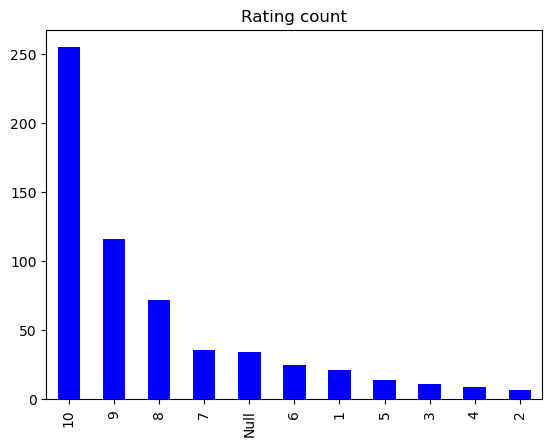

In [9]:
df.rating.value_counts().plot(kind='bar', cmap='winter', title='Rating count')

In [10]:
df.describe()

,helpful,total
count,600.000000,600.000000
mean,8.356667,16.280000
std,30.928095,46.398487
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,3.000000
75%,4.250000,11.000000
max,350.000000,423.000000


In [12]:
df.isna().sum()

username    0
rating      0
helpful     0
total       0
date        0
title       0
review      0
dtype: int64

In [22]:
df.dtypes

username    object
rating      object
helpful      int64
total        int64
date        object
title       object
review      object
dtype: object

In [18]:
li.count('Null')

34

In [24]:
df['rating'] = df['rating'].astype(str)

In [27]:
df['rating'] = df['rating'].astype(object)

In [28]:
df.dtypes


username    object
rating      object
helpful      int64
total        int64
date        object
title       object
review      object
dtype: object